In [2]:
#epsilon method


import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

%matplotlib widget


n = 10
arms = np.random.rand(n)
eps = 0.1

def reward(prob):
  reward = 0;
  for i in range(10):
    if random.random() < prob:
      reward += 1
  return reward


av = np.array([np.random.randint(0, (n+1)), 0]).reshape(1,2)

def bestArm(a):
  bestArm = 0
  bestMean = 0
  for u in a:
    avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1])
    if bestMean < avg:
      bestMean = avg
      bestArm = u[0]
  return bestArm

  
  
plt.xlabel("Plays")
plt.ylabel("Avg Reward")
for i in range(500):
  if random.random() > eps:
    choice = bestArm(av)
    thisAV = np.array([[choice, reward(arms[choice])]])
    av = np.concatenate((av, thisAV), axis = 0)
  else:
    choice = np.where(arms == np.random.choice(arms))[0][0]
    thisAV = np.array([[choice, reward(arms[choice])]])
    av = np.concatenate((av, thisAV), axis = 0)
  percCorrect = 100*(len(av[np.where(av[:,0] == np.argmax(arms))])/len(av))
  runningMean = np.mean(av[:,1])
  plt.scatter(i, runningMean)

FigureCanvasNbAgg()

In [34]:
#Optimise memory usage

n = 10
arms = np.random.rand(n)
eps = 0.1

av = np.ones(n) #initialise action-value array
counts = np.zeros(n) #stores countes of how many times we've taken a particular action

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

#our bestAarm function is much simpler now
def bestArm(a):
    return np.argmax(a) #returns index of element with greatest value

%matplotlib widget

plt.xlabel("Plays")
plt.ylabel("Mean Reward")
for i in range(500):
    if random.random() > eps:
        choice = bestArm(av)
        counts[choice] += 1
        k = counts[choice]
        rwd = reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0] #randomly choose an arm (returns index)
        counts[choice] += 1
        k = counts[choice]
        rwd = reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
    #have to use np.average and supply the weights to get a weighted average
    runningMean = np.average(av, weights = np.array([counts[j]/np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, runningMean)
        

FigureCanvasNbAgg()

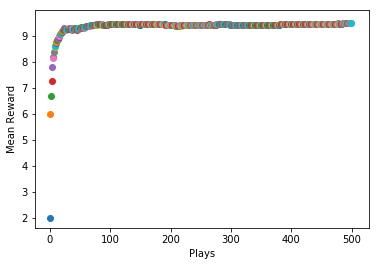

In [37]:
#softmax for random selection

%matplotlib inline

n = 10
arms = np.random.rand(n)

av = np.ones(n) #initialize action-value array, stores running reward mean
counts = np.zeros(n) #stores counts of how many times we've taken a particular action
#stores our softmax-generated probability ranks for each action
av_softmax = np.zeros(n)
av_softmax[:] = 0.1 #initialize each action to have equal probability

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

tau = 1.12 #tau was selected by trial and error
def softmax(av):
    probs = np.zeros(n)
    for i in range(n):
        softm = ( np.exp(av[i] / tau) / np.sum( np.exp(av[:] / tau) ) )
        probs[i] = softm
    return probs

plt.xlabel("Plays")
plt.ylabel("Mean Reward")
for i in range(500):
    #select random arm using weighted probability distribution
    choice = np.where(arms == np.random.choice(arms, p=av_softmax))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd =  reward(arms[choice])
    old_avg = av[choice]
    new_avg = old_avg + (1/k)*(rwd - old_avg)
    av[choice] = new_avg
    av_softmax = softmax(av) #update softmax probabilities for next play
        
    runningMean = np.average(av, weights=np.array([counts[j]/np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, runningMean)
